# LOAD USEFUL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, save, load
import torch.optim as optim
from torch.utils.data import DataLoader
import random
from sklearn.metrics import precision_score, recall_score, fbeta_score
from tabulate import tabulate
import copy

# DEVICE CONFIGURATION

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# DEFINE GLOBAL VARIABLES

In [3]:
#NETWORKS SIZES
Input_Size_1= 5
Hidden_Size_1=40
Output_Size_1=4
Hidden_Size_2= 40
Output_Size_2= 2


# training and hyperparamentes
learning_rate_1 = 0.002
learning_rate_2 = 0.0003
learning_rate_3=0.015
n_epochs = 200



colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k',
    '#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FF33FF', '#FFFF33',
    '#990000', '#009900', '#000099', '#999900', '#990099', '#009999',
    '#CC0000', '#00CC00', '#0000CC', '#CCCC00', '#CC00CC', '#00CCCC',
    '#FF6666', '#66FF66', '#6666FF', '#FFFF66', '#FF66FF', '#66FFFF'
]


# FIRST ORDER NETWORK ARCHITECTURE DEFINITION

In [4]:
class FirstOrderNetwork(nn.Module):

    def __init__(self, input_size, hidden_size , output_size):
        super(FirstOrderNetwork, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)

        self.activation = nn.Sigmoid()
        self.activation_2 = nn.ReLU()

        nn.init.uniform_(self.input_layer.weight, -1.0, 1.0)
        nn.init.uniform_(self.hidden_layer.weight, -1.0, 1.0)
        nn.init.uniform_(self.output_layer.weight, -1.0, 1.0)

    def forward(self, x):

        out = self.activation_2(self.input_layer(x))
        hid = self.activation(self.hidden_layer(out))
        out = self.activation(self.output_layer(hid))

        return hid, out

# SECOND ORDER NETWORK ARCHITECTURE DEFINITION

In [5]:
class SecondOrderNetwork(nn.Module):
    def __init__(self, first_order_hidden, hidden_size , output_size):

        super(SecondOrderNetwork, self).__init__()

        self.hidden = nn.Linear(first_order_hidden, hidden_size)
        self.wager = nn.Linear(hidden_size , output_size)
        self.activation = nn.Sigmoid()
        self.activation_2 = nn.ReLU()

        nn.init.uniform_(self.hidden.weight, -1.0, 1.0)
        nn.init.uniform_(self.wager.weight, -1.0, 1.0)

    def forward(self, x):
        out = self.activation_2(self.hidden(x))
        out = self.activation(self.wager(out))

        return out

#FUNCTION THAT CREATES PATTERNS


In [6]:
def generate_iowa_patterns( first_input):

    # Generate a random outcome (win or loss)
    outcome = np.random.choice([1.0, 0.0], p=[0.7, 0.3])

    # Generate the first-order network's input pattern
    first_order_input = first_input.tolist()
    first_order_input.append(outcome)

    # Generate the second-order network's target pattern
    second_order_target = np.zeros(2)
    if outcome == 1.0:
        second_order_target[0] = 1.0  # High wager
    else:
        second_order_target[1] = 1.0  # Low wager

    noise = np.random.uniform(-0.02, 0.02, size=(len(first_order_input),))
    first_order_input_with_noise = first_order_input + noise

    pattern = ((first_order_input_with_noise, second_order_target))

    return pattern


# DEFINITION OF 15 HIGH CONSCIOUSNESS NETWORKS AND 15 LOW CONSCIOUSNESS NETWORKS


In [7]:
num_networks=30
networks = []
for i in range(num_networks):
    first_order_network = FirstOrderNetwork(Input_Size_1, Hidden_Size_1, Output_Size_1)
    second_order_network = SecondOrderNetwork( Hidden_Size_1  ,  Hidden_Size_2 ,  Output_Size_2)

    criterion_1 = nn.MSELoss()
    criterion_2 = nn.MSELoss()

    optimizer_1 = optim.SGD(first_order_network.parameters(), lr=learning_rate_1)

    if i<15:
      #LOW CONSCIOUSNESS
      optimizer_2 = optim.SGD(second_order_network.parameters(), lr=learning_rate_2)
    else:
      #HIGH CONSCIOUSNESS
      optimizer_2 = optim.SGD(second_order_network.parameters(), lr=learning_rate_3)

    networks.append([first_order_network, second_order_network , criterion_1 , criterion_2 , optimizer_1 , optimizer_2])



# TRAINING LOOP  - LOW CONSCIOUSNESS

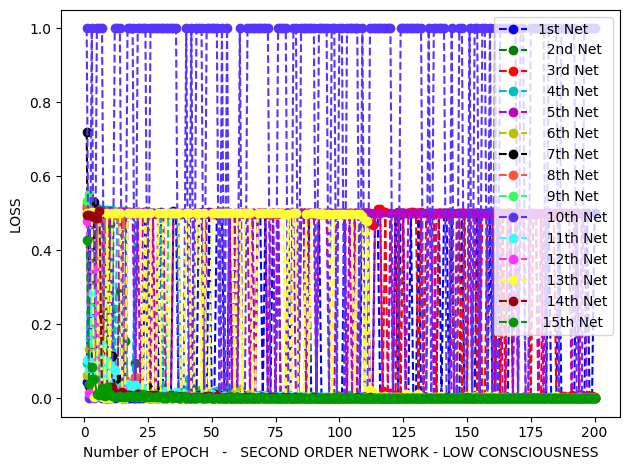

In [8]:

num_trials = 2000
epoch_list = list(range(1, n_epochs + 1))
epoch_1_order= np.zeros(( len(networks),n_epochs))
epoch_2_order= np.zeros((  len(networks),n_epochs))

for network in range(0,15):
    for epoch in range(n_epochs):

      selected_deck = np.random.randint(4)
      first_order_output= [0,0,0,0]
      first_order_output= torch.Tensor (first_order_output)

      for j in range(num_trials):

          pattern= generate_iowa_patterns(first_order_output)
          first_order_input, second_order_target = pattern

          first_order_input=torch.Tensor(first_order_input)
          second_order_target=torch.Tensor(second_order_target)

          hidden_first_order , first_order_output = networks[network][0](first_order_input)
          second_order_output = networks[network][1](hidden_first_order)

          loss_2 = networks[network][3](second_order_output, second_order_target)

          loss_2.backward()

          networks[network][5].step()

          networks[network][5].zero_grad()


      epoch_2_order[network][epoch] = loss_2.item()


for i in range(0,15):
  plt.plot(epoch_list,epoch_2_order[i] , linestyle='--', marker='o',color=colors[i])
plt.legend(['1st Net','  2nd Net','  3rd Net','  4th Net','  5th Net','  6th Net','  7th Net','  8th Net','  9th Net','  10th Net','  11th Net','  12th Net','  13th Net','  14th Net',' 15th Net'] , loc='upper right')
plt.xlabel('Number of EPOCH   -   SECOND ORDER NETWORK - LOW CONSCIOUSNESS')
plt.ylabel('LOSS ')
plt.tight_layout()
plt.show()




# TRAINING LOOP  - HIGH CONSCIOUSNESS

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


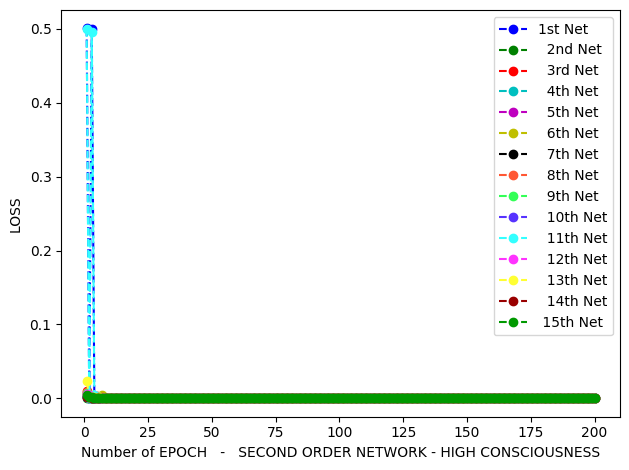

In [9]:

for network in range(15,30):
    print(network)
    for epoch in range(n_epochs):

      selected_deck = np.random.randint(4)
      first_order_output= [0,0,0,0]
      first_order_output= torch.Tensor (first_order_output)

      for j in range(num_trials):

          pattern= generate_iowa_patterns(first_order_output)
          first_order_input, second_order_target = pattern

          first_order_input=torch.Tensor(first_order_input)
          second_order_target=torch.Tensor(second_order_target)

          hidden_first_order , first_order_output = networks[network][0](first_order_input)
          second_order_output = networks[network][1](hidden_first_order)

          loss_2 = networks[network][3](second_order_output, second_order_target)

          loss_2.backward()

          networks[network][5].step()

          networks[network][5].zero_grad()


      epoch_2_order[network][epoch] = loss_2.item()



for i in range(15,30):
  plt.plot(epoch_list,epoch_2_order[i] , linestyle='--', marker='o',color=colors[i-15])
plt.legend(['1st Net','  2nd Net','  3rd Net','  4th Net','  5th Net','  6th Net','  7th Net','  8th Net','  9th Net','  10th Net','  11th Net','  12th Net','  13th Net','  14th Net',' 15th Net'] , loc='upper right')
plt.xlabel('Number of EPOCH   -   SECOND ORDER NETWORK - HIGH CONSCIOUSNESS')
plt.ylabel('LOSS ')
plt.tight_layout()
plt.show()





# MOST INTERESTING NETS

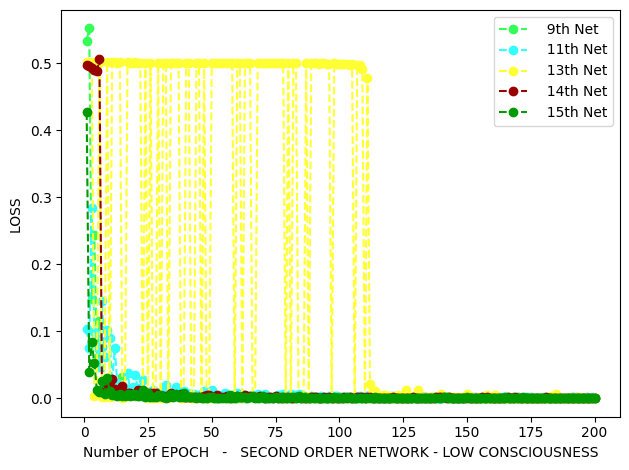

In [14]:
plt.plot(epoch_list,epoch_2_order[8] , linestyle='--', marker='o',color=colors[8])
plt.plot(epoch_list,epoch_2_order[10] , linestyle='--', marker='o',color=colors[10])
plt.plot(epoch_list,epoch_2_order[12] , linestyle='--', marker='o',color=colors[12])
plt.plot(epoch_list,epoch_2_order[13] , linestyle='--', marker='o',color=colors[13])
plt.plot(epoch_list,epoch_2_order[14] , linestyle='--', marker='o',color=colors[14])

plt.legend(['  9th Net' ,'  11th Net' , '  13th Net' , '  14th Net' , '  15th Net'] , loc='upper right')
plt.xlabel('Number of EPOCH   -   SECOND ORDER NETWORK - LOW CONSCIOUSNESS')
plt.ylabel('LOSS ')
plt.tight_layout()
plt.show()

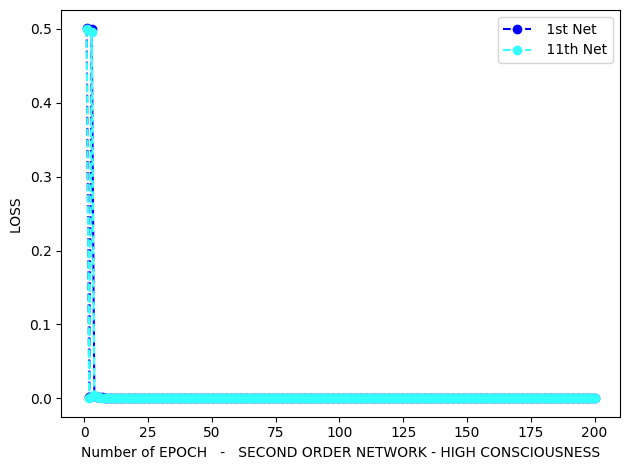

In [13]:
plt.plot(epoch_list,epoch_2_order[15] , linestyle='--', marker='o',color=colors[15-15])
plt.plot(epoch_list,epoch_2_order[25] , linestyle='--', marker='o',color=colors[25-15])

plt.legend([' 1st Net' ,' 11th Net'] , loc='upper right')
plt.xlabel('Number of EPOCH   -   SECOND ORDER NETWORK - HIGH CONSCIOUSNESS')
plt.ylabel('LOSS ')
plt.tight_layout()
plt.show()